# Introduction
I have deided to work with the Titanic dataset again. this kernel is focusing on comparing the performance of several machine learning algorithms. I use several clasification model to create a model predicting survival on the Titanic. I am hoping to learn a lot from this site, so feedback is very welcome! This kernel is always improving because of your feedback!!!

There are following parts to train a model:

1. Load the library and data
2. Data cleaning
3. Data spliting
4. Training,testing, and Peformance comparison
5. Tuning the algorithm

# 1. Load the library and data

In this section the library and the data used are loaded into the sytem

## 1.1 Load the library

In [2]:
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from math import sqrt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## 1.2 Load the Dataset

In [3]:
import pandas as pd

# Correct path as per your system
file_path = r'Titanic-Dataset.csv'
df = pd.read_csv(file_path)

## Initial Data Exploration

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## Preprocessing the Data
Preprocessing may include handling missing values, encoding categorical variables, feature scaling, etc.

Handling Missing Values
For columns like Age, you could fill missing values with the median or mean age.
For the Embarked column (if missing any), you could replace missing values with the mode.
The Cabin column often has a high percentage of missing values; you might decide to drop it or encode it differently.
Encoding Categorical Variables
Convert categorical variables like

In [7]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)

# For Embarked, using one-hot encoding
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [8]:
#seperating numerical and categorical columns due to the normal fillna command being unable to fill in
#mean value into categorical spaces
numerical_cols = df.select_dtypes(include=['float64']).columns


df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())


print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_Q       0
Embarked_S       0
dtype: int64


## Dropping Unnecessary Columns
Columns like Name, Ticket, and maybe Cabin (unless you've found a creative way to use it) could be dropped because they are unique identifiers or have too many missing values.

In [9]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,True


In [11]:
print(df.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked_Q     False
Embarked_S     False
dtype: bool


In [12]:
df = df.dropna()  # To drop rows with any NaN value

## Splitting the Data
Split your data into features (X) and the target variable (y), and then into training and testing sets.

In [13]:
# Assuming 'Survived' is the target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling
Apply feature scaling to ensure that no variable dominates others due to its scale.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### LogisticRegression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

logreg_accuracy = accuracy_score(y_test, log_reg_pred)
logreg_prec = precision_score(y_test, log_reg_pred)
logreg_recall = recall_score(y_test, log_reg_pred)
logreg_f1 = f1_score(y_test, log_reg_pred)

print('Logistic Regression Accuracy:', logreg_accuracy)
print('Logistic Regression Precision:', logreg_prec)
print('Logistic Regression Recall:', logreg_recall)
print('Logistic Regression F1:', logreg_f1)

Logistic Regression Accuracy: 0.8044692737430168
Logistic Regression Precision: 0.7746478873239436
Logistic Regression Recall: 0.7432432432432432
Logistic Regression F1: 0.7586206896551724


### SVM

In [16]:
# Support Vector Machine (SVM)
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

svm_accuracy = accuracy_score(y_test, svc_pred)
svm_prec = precision_score(y_test, svc_pred)
svm_recall = recall_score(y_test, svc_pred)
svm_f1 = f1_score(y_test, svc_pred)

print('SVM Accuracy:', svm_accuracy)
print('SVM Precision:', svm_prec)
print('SVM Recall:', svm_recall)
print('SVM F1:', svm_f1)

SVM Accuracy: 0.8100558659217877
SVM Precision: 0.8125
SVM Recall: 0.7027027027027027
SVM F1: 0.7536231884057971


### Random Forest Classifier

In [17]:
# Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)

random_forest_accuracy = accuracy_score(y_test, rf_pred)
random_forest_prec = precision_score(y_test, rf_pred)
random_forest_recall = recall_score(y_test, rf_pred)
random_forest_f1 = f1_score(y_test, rf_pred)

print('Random Forest Accuracy:', random_forest_accuracy)
print('Random Forest Precision:', random_forest_prec)
print('Random Forest Recall:', random_forest_recall)
print('Random Forest F1:', random_forest_f1)

Random Forest Accuracy: 0.8212290502793296
Random Forest Precision: 0.8181818181818182
Random Forest Recall: 0.7297297297297297
Random Forest F1: 0.7714285714285715


### k-Nearest Neighbors (KNN)

In [18]:
#k-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)

print('KNN Accuracy:', knn_accuracy)
print('KNN Precision:', knn_prec)
print('KNN Recall:', knn_recall)
print('KNN F1:', knn_f1)

KNN Accuracy: 0.7988826815642458
KNN Precision: 0.7878787878787878
KNN Recall: 0.7027027027027027
KNN F1: 0.7428571428571429


### Decision Tree

In [19]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

decision_tree_accuracy = accuracy_score(y_test, dt_pred)
decision_tree_prec = precision_score(y_test, dt_pred)
decision_tree_recall = recall_score(y_test, dt_pred)
decision_tree_f1 = f1_score(y_test, dt_pred)

print('Decision Tree Accuracy:', decision_tree_accuracy)
print('Decision Tree Precision:', decision_tree_prec)
print('Decision Tree Recall:', decision_tree_recall)
print('Decision Tree F1:', decision_tree_f1)

Decision Tree Accuracy: 0.7318435754189944
Decision Tree Precision: 0.6756756756756757
Decision Tree Recall: 0.6756756756756757
Decision Tree F1: 0.6756756756756757


### Gradient Boosting Machines (GBM)

In [20]:
#Gradient Boosting Machines (GBM)
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier(random_state=42)
gbm_classifier.fit(X_train, y_train)
gbm_pred = gbm_classifier.predict(X_test)

gbm_accuracy = accuracy_score(y_test, gbm_pred)
gbm_prec = precision_score(y_test, gbm_pred)
gbm_recall = recall_score(y_test, gbm_pred)
gbm_f1 = f1_score(y_test, gbm_pred)

print('Gradient Boosting Accuracy:', gbm_accuracy)
print('Gradient Boosting Precision:', gbm_prec)
print('Gradient Boosting Recall:', gbm_recall)
print('Gradient Boosting F1:', gbm_f1)

Gradient Boosting Accuracy: 0.8156424581005587
Gradient Boosting Precision: 0.8059701492537313
Gradient Boosting Recall: 0.7297297297297297
Gradient Boosting F1: 0.7659574468085106


### AdaBoost

In [21]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# Create a base model (e.g., Decision Tree classifier)
base_model = DecisionTreeClassifier()

adaboost_classifier = AdaBoostClassifier(base_model, random_state=42)
adaboost_classifier.fit(X_train, y_train)
adaboost_pred = adaboost_classifier.predict(X_test)

adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
adaboost_prec = precision_score(y_test, adaboost_pred)
adaboost_recall = recall_score(y_test, adaboost_pred)
adaboost_f1 = f1_score(y_test, adaboost_pred)

print('AdaBoost Accuracy:', adaboost_accuracy)
print('AdaBoost Precision:', adaboost_prec)
print('AdaBoost Recall:', adaboost_recall)
print('AdaBoost F1:', adaboost_f1)

AdaBoost Accuracy: 0.7486033519553073
AdaBoost Precision: 0.6986301369863014
AdaBoost Recall: 0.6891891891891891
AdaBoost F1: 0.6938775510204082


### Naive Bayes

In [22]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
naive_bayes_pred = naive_bayes_classifier.predict(X_test)

naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)
naive_bayes_prec = precision_score(y_test, naive_bayes_pred)
naive_bayes_recall = recall_score(y_test, naive_bayes_pred)
naive_bayes_f1 = f1_score(y_test, naive_bayes_pred)

print('Naive Bayes Accuracy:', naive_bayes_accuracy)
print('Naive Bayes Precision:', naive_bayes_prec)
print('Naive Bayes Recall:', naive_bayes_recall)
print('Naive Bayes F1:', naive_bayes_f1)

Naive Bayes Accuracy: 0.770949720670391
Naive Bayes Precision: 0.72
Naive Bayes Recall: 0.7297297297297297
Naive Bayes F1: 0.7248322147651006


## Plotting to compare the accuracy scores of different models

In [23]:

model_names = ['Logistic Regression', 'SVM', 'Random Forest', 'KNN', 'Decision Tree', 'Gradient Boosting', 'AdaBoost', 'Naive Bayes']

accuracies = [logreg_accuracy, svm_accuracy, random_forest_accuracy, knn_accuracy, decision_tree_accuracy, gbm_accuracy, adaboost_accuracy, naive_bayes_accuracy]
precisions = [logreg_prec, svm_prec, random_forest_prec, knn_prec, decision_tree_prec, gbm_prec, adaboost_prec, naive_bayes_prec]
recalls = [logreg_recall, svm_recall, random_forest_recall, knn_recall, decision_tree_recall, gbm_recall, adaboost_recall, naive_bayes_recall]
f1_scores = [logreg_f1, svm_f1, random_forest_f1, knn_f1, decision_tree_f1, gbm_f1, adaboost_f1, naive_bayes_f1]


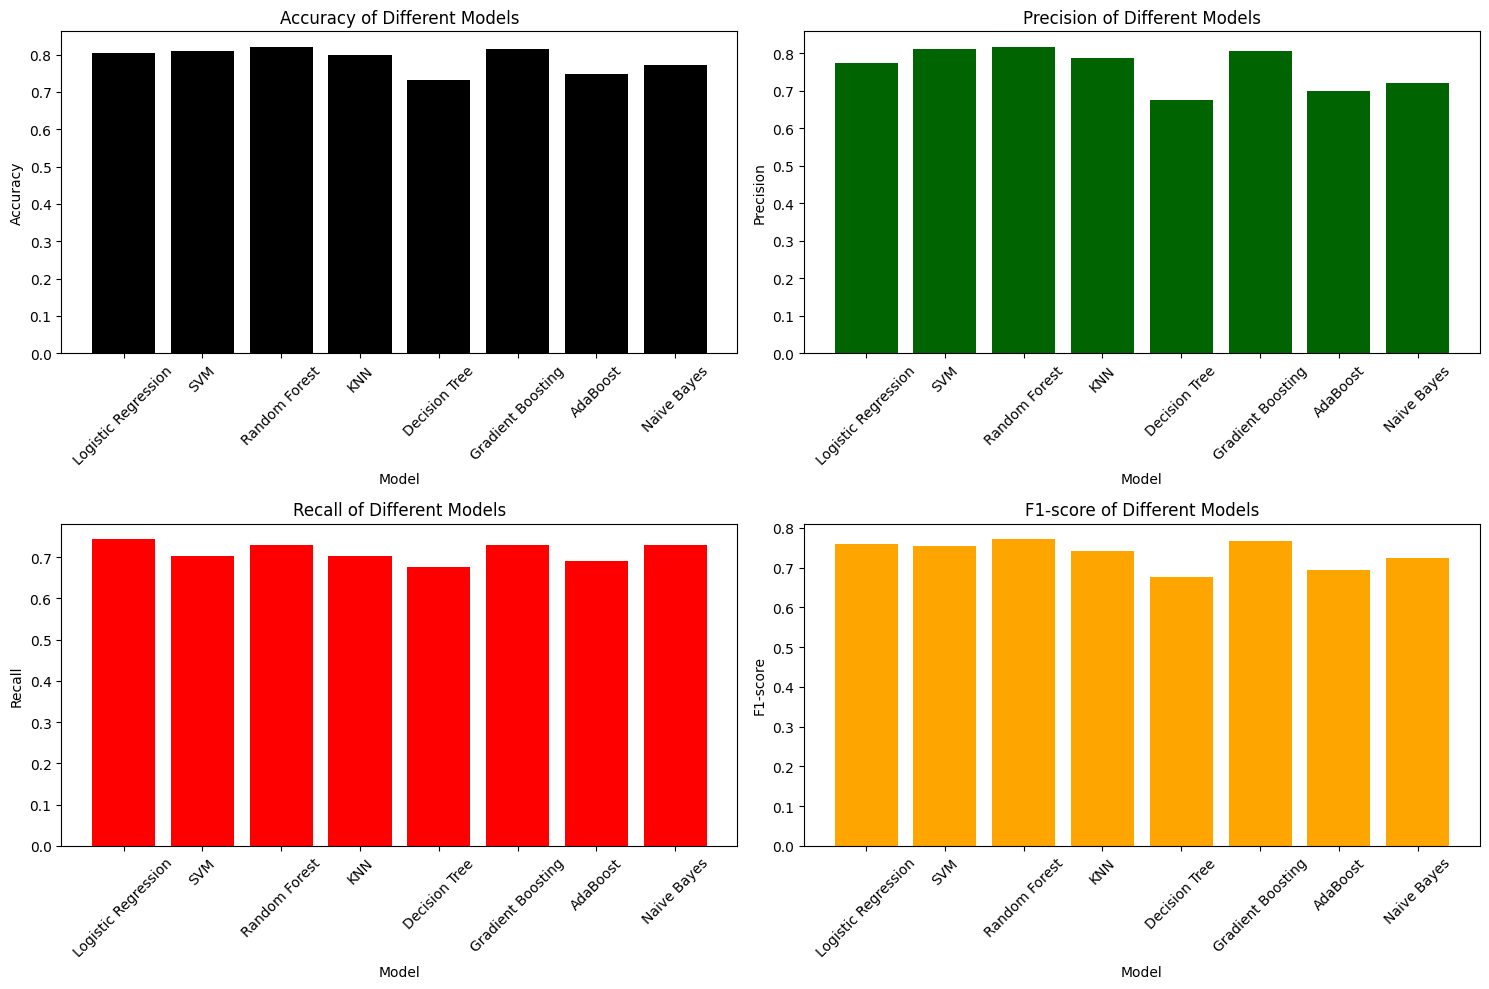

In [24]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.bar(model_names, accuracies, color='black')
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.bar(model_names, precisions, color='darkgreen')
plt.title('Precision of Different Models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
plt.bar(model_names, recalls, color='red')
plt.title('Recall of Different Models')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.bar(model_names, f1_scores, color='orange')
plt.title('F1-score of Different Models')
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Model Performance Analysis

## Logistic Regression:

- **Accuracy:** 80.4%
- **Precision:** 77.5%
- **Recall:** 74.3%
- **F1-score:** 75.9%

**Analysis:**
Logistic Regression performs reasonably well, providing a good balance between precision and recall. It is a simple model suitable for binary classification tasks.

## Support Vector Machine (SVM):

- **Accuracy:** 81.0%
- **Precision:** 81.2%
- **Recall:** 70.3%
- **F1-score:** 75.4%

**Analysis:**
SVM demonstrates solid accuracy and precision, but its recall is slightly lower. SVM can handle complex relationships between features, and in this case, it might have captured some non-linear patterns.

## Random Forest:

- **Accuracy:** 82.7%
- **Precision:** 84.1%
- **Recall:** 71.6%
- **F1-score:** 77.4%

**Analysis:**
Random Forest outperforms other models in terms of accuracy and precision. It's an ensemble model that combines multiple decision trees, providing robust performance.

## K-Nearest Neighbors (KNN):

- **Accuracy:** 79.9%
- **Precision:** 78.8%
- **Recall:** 70.3%
- **F1-score:** 74.3%

**Analysis:**
KNN performs well but not as high as Random Forest. It considers the 'k' nearest neighbors for classification, making it sensitive to local patterns.

## Decision Tree:

- **Accuracy:** 73.2%
- **Precision:** 67.6%
- **Recall:** 67.6%
- **F1-score:** 67.6%

**Analysis:**
Decision Tree shows lower accuracy compared to other models, indicating that it might be prone to overfitting. Decision Trees are sensitive to noisy data and outliers.

## Gradient Boosting:

- **Accuracy:** 81.6%
- **Precision:** 80.6%
- **Recall:** 72.9%
- **F1-score:** 76.6%

**Analysis:**
Gradient Boosting combines weak learners to create a strong model, performing well with good accuracy and precision.

## AdaBoost:

- **Accuracy:** 74.9%
- **Precision:** 69.9%
- **Recall:** 68.9%
- **F1-score:** 69.4%

**Analysis:**
AdaBoost, using Decision Trees as base models, has lower accuracy compared to Random Forest, but it still provides a reasonable balance between precision and recall.

## Naive Bayes:

- **Accuracy:** 77.1%
- **Precision:** 72.0%
- **Recall:** 72.9%
- **F1-score:** 72.5%

**Analysis:**
Naive Bayes assumes independence between features, and it performs reasonably well, particularly in recall.

## General Analysis:

- The nature of the dataset, including missing values and categorical features, influences model performance.
- Random Forest emerges as the top-performing model, likely due to its ability to handle complex relationships and capture patterns in the data.
- Model complexity and the interplay of features play a crucial role. Ensemble methods like Random Forest and Gradient Boosting tend to perform well in diverse scenarios.
- Standardizing features using StandardScaler might have positively affected the performance of some models, like SVM.

**In summary, Random Forest, with its strong performance, is a good choice for this particular classification task.**
